# PCA
- The point of PCA is to decrease the features of a data set to the factors that explain the most varience in the Data 
- Uses Octonogal lines for esach feature so the line that passes through the data points that explain the most varience is used
- unlike regression that looks for the line if best fit the PCA uses right angle lines
- finding whats important in high dimantional Data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
data = load_breast_cancer()

In [37]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [38]:
df = pd.DataFrame(data["data"], columns= data["feature_names"])

<AxesSubplot:ylabel='count'>

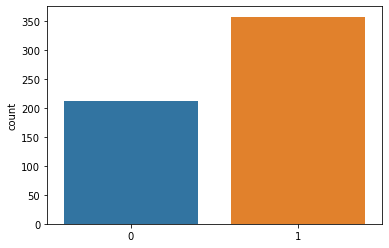

In [39]:
sns.countplot(x = data["target"])

## 2 principal Components
- WE can visualize why we start with 2
- Scale so that each feature has a single unit varience

In [14]:
scalar = StandardScaler()

In [40]:
scalar.fit(df)

StandardScaler()

In [42]:
scaledData = scalar.transform(df)

In [48]:
scaledData

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Instaniate PCA Object
- find principal componets by fitting 
- spply rotation and dimentionality reduction with transform

In [76]:
from sklearn.decomposition import PCA

In [77]:
princial = PCA(n_components=4)

In [78]:
princial.fit(scaledData)

PCA(n_components=4)

In [79]:
transformed_pcaData = princial.transform(scaledData)

In [80]:
transformed_pcaData

array([[ 9.19283683,  1.94858307, -1.12316615,  3.63373078],
       [ 2.3878018 , -3.76817174, -0.5292927 ,  1.1182639 ],
       [ 5.73389628, -1.0751738 , -0.55174758,  0.91208272],
       ...,
       [ 1.25617928, -1.90229671,  0.56273052, -2.089227  ],
       [10.37479406,  1.67201011, -1.87702933, -2.3560311 ],
       [-5.4752433 , -0.67063679,  1.49044311, -2.29915716]])

In [81]:
transformed_pcaData.shape

(569, 4)

In [82]:
coponents = pd.DataFrame(princial.components_, columns=data["feature_names"])

In [83]:
coponents

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053


<AxesSubplot:>

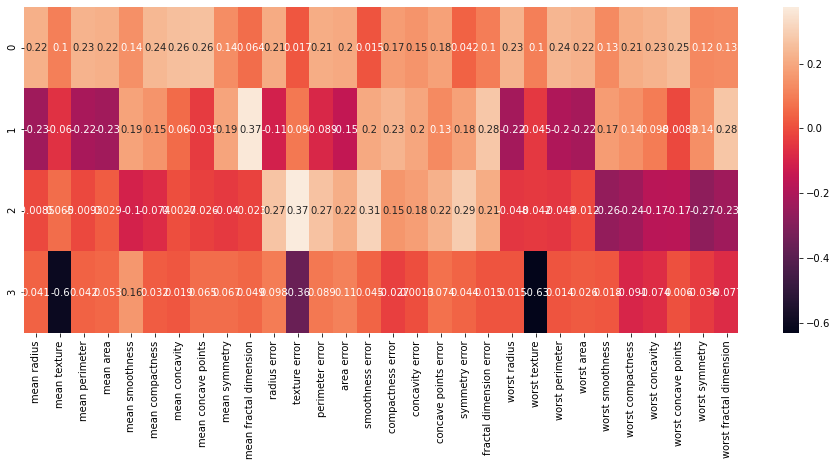

In [84]:
plt.figure(figsize=(16,6))
sns.heatmap(coponents, annot=True)

In [86]:
transformed_pcaData.shape

(569, 4)

In [87]:
working_df = pd.DataFrame(transformed_pcaData)

In [88]:
working_df

,0,1,2,3
0,9.192837,1.948583,-1.123166,3.633731
1,2.387802,-3.768172,-0.529293,1.118264
2,5.733896,-1.075174,-0.551748,0.912083
3,7.122953,10.275589,-3.232790,0.152547
4,3.935302,-1.948072,1.389767,2.940639
...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314
565,3.793382,-3.584048,2.088476,-2.506028
566,1.256179,-1.902297,0.562731,-2.089227
567,10.374794,1.672010,-1.877029,-2.356031


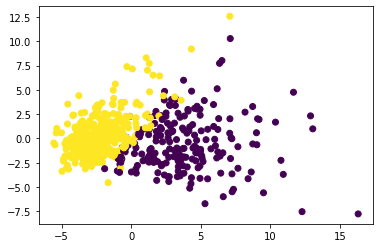

In [89]:
plt.scatter(transformed_pcaData[:,0], transformed_pcaData[:,1], c = data["target"])

In [90]:
working_df["target"] = data["target"]

In [91]:
working_df

,0,1,2,3,target
0,9.192837,1.948583,-1.123166,3.633731,0
1,2.387802,-3.768172,-0.529293,1.118264,0
2,5.733896,-1.075174,-0.551748,0.912083,0
3,7.122953,10.275589,-3.232790,0.152547,0
4,3.935302,-1.948072,1.389767,2.940639,0
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0
565,3.793382,-3.584048,2.088476,-2.506028,0
566,1.256179,-1.902297,0.562731,-2.089227,0
567,10.374794,1.672010,-1.877029,-2.356031,0


In [92]:
X = transformed_pcaData
y = data["target"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
log_model = LogisticRegression(n_jobs=400)

In [97]:
log_model.fit(X_train, y_train)

LogisticRegression(n_jobs=400)

In [98]:
prediction = log_model.predict(X_test)

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.99      0.98      0.99       109

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

